In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers

In [2]:
#Definición de directorios:
dataset_dir = os.path.join(os.getcwd(), "dataset")
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")
valid_dir = os.path.join(dataset_dir, "valid")

# Definimos y creamos la carpeta donde se guardarán los modelos.
carpeta_modelos = os.path.join(os.getcwd(), "Modelos")

cards_type_dir = os.path.join(carpeta_modelos, "cards_type")

os.makedirs(cards_type_dir, exist_ok=True)

print(f"Carpeta de modelos creada: {cards_type_dir}")

Carpeta de modelos creada: c:\Users\66439464\Desktop\PEC1AP\Modelos\cards_type


### Carga de datos y pre-procesamientos

In [3]:
# Parámetros
batch_size = 32  # Ajustable según rendimiento
img_height = 224
img_width = 224
AUTOTUNE = tf.data.AUTOTUNE
tf.random.set_seed(42)  # Establecemos semilla

In [4]:
# Carga de datos directamente con la librería Tensorflor:

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode="categorical",
    seed=42,
    shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode="categorical",
    seed=42,
    shuffle=False)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode="categorical",
    seed=42,
    shuffle=False)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


In [5]:
# Visualizar clases
class_names = train_ds.class_names
print("Clases detectadas:", class_names)
print("Número de clases:", len(class_names))

Clases detectadas: ['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']
Número de clases: 53


In [6]:
# Normalización y optimización
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=AUTOTUNE)

Min pixel value: 0.0
Max pixel value: 1.0
Forma del array de etiquetas: (53,)


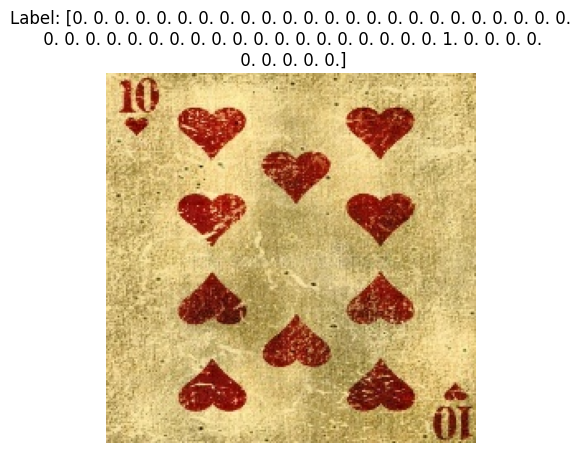

In [35]:
for image_batch, labels_batch in train_ds.take(1):
    first_image = image_batch.numpy()[0]  # Convertir a numpy
    label = labels_batch.numpy()[0]  # Etiqueta en formato one-hot
"""
Considerar eliminar del ciclo por next(iter):
    image_batch, labels_batch = next(iter(train_ds.take(1)))
    first_image = image_batch.numpy()[0]
    label = labels_batch.numpy()[0]

"""
    # Imprimir valores mínimos y máximos de los píxeles
    print("Min pixel value:", first_image.min())
    print("Max pixel value:", first_image.max())
    print("Forma del array de etiquetas:", label.shape)

    # Mostrar la imagen
    plt.imshow((first_image * 255).astype("uint8"))  # Desnormalizar
    plt.title(f"Label: {label}")  
    plt.axis("off")  
    plt.show()

### Generación de modelos y entrenamientos.

In [36]:
# Definición del primer modelo FILTROS[16,32,64] CAPA_DENSA[128]

from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential

Primer_modelo_cartas = Sequential([
    Input(shape=(224, 224, 3)),  # Definimos la forma de entrada aquí
    layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(53, activation='softmax')  # Adaptamos al número de clases detectadas respecto al primer ejercicio.
])

# Compilamos el modelo
Primer_modelo_cartas.compile(loss="categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy",  
                               tf.keras.metrics.Precision(name='precision'),
                               tf.keras.metrics.Recall(name='recall'),
                               tf.keras.metrics.AUC(name='auc')])

# Mostramos el resumen del modelo
Primer_modelo_cartas.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 53)             │         6,837 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,453,077 (24.62 MB)

 Trainable params: 6,453,077 (24.62 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
#Ajustamos valores de ES y checkpoints.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  
                               patience=5,  
                               min_delta=0.05,  
                               restore_best_weights=True)

checkpoint = ModelCheckpoint('Modelos/cards_type/Primer_modelo_cartas.keras',
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only=True)

# Entrenamiento
history_Primer_modelo_cartas = Primer_modelo_cartas.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 59s 240ms/step - accuracy: 0.1390 - auc: 0.7126 - loss: 3.5124 - precision: 0.4939 - recall: 0.0342 - val_accuracy: 0.5132 - val_auc: 0.9538 - val_loss: 1.7210 - val_precision: 0.7642 - val_recall: 0.3547
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 52s 216ms/step - accuracy: 0.5527 - auc: 0.9514 - loss: 1.6685 - precision: 0.8389 - recall: 0.3890 - val_accuracy: 0.6453 - val_auc: 0.9692 - val_loss: 1.2083 - val_precision: 0.8242 - val_recall: 0.5660
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 51s 214ms/step - accuracy: 0.7746 - auc: 0.9864 - loss: 0.8360 - precision: 0.9237 - recall: 0.6775 - val_accuracy: 0.7208 - val_auc: 0.9670 - val_loss: 1.1604 - val_precision: 0.7913 - val_recall: 0.6868
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 51s 213ms/step - accuracy: 0.9156 - auc: 0.9966 - loss: 0.3329 - precision: 0.9569 - recall: 0.8702 - val_accuracy: 0.7660 - val_auc: 0.9629 - val_loss: 1.0848 - val_precision: 0.8186 - val_recall: 0.7321
Epoch 5/50
239/239 ━

In [38]:
# Evaluación del modelo
loss, accuracy, precision, recall, auc = Primer_modelo_cartas.evaluate(val_ds, verbose=1)

# Mostrar los resultados
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test AUC: {auc:.4f}')

2/9 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7812 - auc: 0.9560 - loss: 1.2018 - precision: 0.8173 - recall: 0.7344 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7643 - auc: 0.9623 - loss: 1.1029 - precision: 0.8136 - recall: 0.7242
Test Loss: 1.0848
Test Accuracy: 0.7660
Test Precision: 0.8186
Test Recall: 0.7321
Test AUC: 0.9629


In [39]:
# Definición segundo modelo FILTROS[16,32,64] DROPOUT[0.4] CAPA_DENSA[128]

Segundo_modelo_cartas_drop = Sequential([
    Input(shape=(224, 224, 3)),
    layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(53, activation='softmax') 
])

Segundo_modelo_cartas_drop.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy",  
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall'),
             tf.keras.metrics.AUC(name='auc')]
)

Segundo_modelo_cartas_drop.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 53)             │         6,837 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,453,077 (24.62 MB)

 Trainable params: 6,453,077 (24.62 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  
                               patience=5,  
                               min_delta=0.05,  
                               restore_best_weights=True)

checkpoint = ModelCheckpoint('Modelos/cards_type/Segundo_modelo_cartas_drop.keras',
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only=True)

history_Segundo_modelo_cartas_drop = Segundo_modelo_cartas_drop.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=[checkpoint, early_stopping])

Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 58s 233ms/step - accuracy: 0.1675 - auc: 0.7378 - loss: 3.3638 - precision: 0.4421 - recall: 0.0455 - val_accuracy: 0.5585 - val_auc: 0.9585 - val_loss: 1.5829 - val_precision: 0.8058 - val_recall: 0.4226
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 57s 240ms/step - accuracy: 0.5782 - auc: 0.9521 - loss: 1.6169 - precision: 0.8264 - recall: 0.4211 - val_accuracy: 0.6906 - val_auc: 0.9725 - val_loss: 1.1036 - val_precision: 0.8743 - val_recall: 0.6038
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 61s 255ms/step - accuracy: 0.7646 - auc: 0.9854 - loss: 0.8572 - precision: 0.9074 - recall: 0.6668 - val_accuracy: 0.7132 - val_auc: 0.9671 - val_loss: 0.9966 - val_precision: 0.8265 - val_recall: 0.6830
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 59s 245ms/step - accuracy: 0.8978 - auc: 0.9962 - loss: 0.3679 - precision: 0.9483 - recall: 0.8519 - val_accuracy: 0.7396 - val_auc: 0.9585 - val_loss: 1.1621 - val_precision: 0.7975 - val_recall: 0.7283
Epoch 5/50
239/239 ━

In [41]:
#Evaluamos nuestro segundo modelo.
loss, accuracy, precision, recall, auc = Segundo_modelo_cartas_drop.evaluate(val_ds, verbose=1)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test AUC: {auc:.4f}')

4/9 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6836 - auc: 0.9745 - loss: 0.9713 - precision: 0.8621 - recall: 0.6536

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7000 - auc: 0.9709 - loss: 0.9788 - precision: 0.8424 - recall: 0.6683
Test Loss: 0.9966
Test Accuracy: 0.7132
Test Precision: 0.8265
Test Recall: 0.6830
Test AUC: 0.9671


In [42]:
# Definición del tercer modelo FILTROS[16,32,64] DROPOUT[0.4] CAPA_DENSA[128] DROPOUT[0.5]

Tercer_modelo_cartas_drop = Sequential([
    Input(shape=(224, 224, 3)), 
    layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Dropout(0.4),  # Dropout antes de Flatten para reducir sobreajuste en convoluciones
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dropout(0.5),  # Dropout adicional en la capa densa para mejorar la generalización
    
    layers.Dense(53, activation='softmax')
])

Tercer_modelo_cartas_drop.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy",  
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall'),
             tf.keras.metrics.AUC(name='auc')]
)

Tercer_modelo_cartas_drop.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 53)             │         6,837 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,453,077 (24.62 MB)

 Trainable params: 6,453,077 (24.62 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  
                               patience=15,  
                               min_delta=0.01,  
                               restore_best_weights=True)

checkpoint = ModelCheckpoint('Modelos/cards_type/Tercer_modelo_cartas_drop.keras',
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only=True)

# Entrenamiento
history_Tercer_modelo_cartas_drop = Tercer_modelo_cartas_drop.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=[checkpoint, early_stopping])

Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 63s 248ms/step - accuracy: 0.0801 - auc: 0.6400 - loss: 3.8346 - precision: 0.2581 - recall: 0.0098 - val_accuracy: 0.4679 - val_auc: 0.9585 - val_loss: 1.8894 - val_precision: 0.7778 - val_recall: 0.1849
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 59s 245ms/step - accuracy: 0.3231 - auc: 0.8977 - loss: 2.4853 - precision: 0.6285 - recall: 0.1545 - val_accuracy: 0.6038 - val_auc: 0.9778 - val_loss: 1.2917 - val_precision: 0.8671 - val_recall: 0.4679
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 58s 244ms/step - accuracy: 0.4636 - auc: 0.9405 - loss: 1.9181 - precision: 0.7780 - recall: 0.3143 - val_accuracy: 0.6943 - val_auc: 0.9796 - val_loss: 1.1016 - val_precision: 0.8895 - val_recall: 0.5774
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 59s 246ms/step - accuracy: 0.5537 - auc: 0.9601 - loss: 1.5871 - precision: 0.8231 - recall: 0.4075 - val_accuracy: 0.7094 - val_auc: 0.9812 - val_loss: 1.0194 - val_precision: 0.8871 - val_recall: 0.6226
Epoch 5/50
239/239 ━

In [44]:
# Evaluación del modelo
loss, accuracy, precision, recall, auc = Tercer_modelo_cartas_drop.evaluate(val_ds, verbose=1)

# Mostrar los resultados
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test AUC: {auc:.4f}')

2/9 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7812 - auc: 0.9579 - loss: 0.9662 - precision: 0.8471 - recall: 0.7812

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8293 - auc: 0.9720 - loss: 0.7195 - precision: 0.8880 - recall: 0.8174
Test Loss: 0.6733
Test Accuracy: 0.8415
Test Precision: 0.8939
Test Recall: 0.8264
Test AUC: 0.9752


In [45]:
# Definición del cuarto modelo con capa de filtros adicional.FILTROS[16,32,64,128] CAPA_DENSA[128]

Cuarto_modelo_cartas = Sequential([
    Input(shape=(224, 224, 3)),  
    layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(53, activation='softmax')
])

# Compilamos el modelo
Cuarto_modelo_cartas.compile(loss="categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy",  
                               tf.keras.metrics.Precision(name='precision'),
                               tf.keras.metrics.Recall(name='recall'),
                               tf.keras.metrics.AUC(name='auc')])

# Mostramos el resumen del modelo
Cuarto_modelo_cartas.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 53)             │         6,837 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,315,669 (12.65 MB)

 Trainable params: 3,315,669 (12.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  
                               patience=15,  
                               min_delta=0.01,  
                               restore_best_weights=True)

checkpoint = ModelCheckpoint('Modelos/cards_type/Cuarto_modelo_cartas.keras',
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only=True)

# Entrenamiento
history_Cuarto_modelo_cartas = Cuarto_modelo_cartas.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=[checkpoint, early_stopping])

In [47]:
# Evaluación del modelo
loss, accuracy, precision, recall, auc = Cuarto_modelo_cartas.evaluate(val_ds, verbose=1)

# Mostrar los resultados
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test AUC: {auc:.4f}')

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.8125 - auc: 0.9645 - loss: 0.9658 - precision: 0.9286 - recall: 0.8125

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.7962 - auc: 0.9816 - loss: 0.7875 - precision: 0.8653 - recall: 0.7798
Test Loss: 0.7563
Test Accuracy: 0.7925
Test Precision: 0.8548
Test Recall: 0.7774
Test AUC: 0.9855


In [48]:
# Definición del quinto modelo, añadimos dropout antes y despues de la capa densa.FILTROS[16,32,64,128] DROPOUT[0.4] CAPA_DENSA[128] DROPOUT[0.5]

Quinto_modelo_cartas = Sequential([
    Input(shape=(224, 224, 3)),  
    layers.Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    layers.Dense(53, activation='softmax')
])

# Compilamos el modelo
Quinto_modelo_cartas.compile(loss="categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy",  
                               tf.keras.metrics.Precision(name='precision'),
                               tf.keras.metrics.Recall(name='recall'),
                               tf.keras.metrics.AUC(name='auc')])

# Mostramos el resumen del modelo
Quinto_modelo_cartas.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 53)             │         6,837 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,315,669 (12.65 MB)

 Trainable params: 3,315,669 (12.65 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  
                               patience=15,  
                               min_delta=0.01,  
                               restore_best_weights=True)

checkpoint = ModelCheckpoint('Modelos/cards_type/Quinto_modelo_cartas.keras',
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only=True)

# Entrenamiento
history_Quinto_modelo_cartas = Quinto_modelo_cartas.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=[checkpoint, early_stopping])

Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 63s 254ms/step - accuracy: 0.0838 - auc: 0.6541 - loss: 3.6848 - precision: 0.2984 - recall: 0.0120 - val_accuracy: 0.4604 - val_auc: 0.9560 - val_loss: 1.9614 - val_precision: 0.8478 - val_recall: 0.1472
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 60s 252ms/step - accuracy: 0.3500 - auc: 0.9160 - loss: 2.3263 - precision: 0.6699 - recall: 0.1771 - val_accuracy: 0.6264 - val_auc: 0.9813 - val_loss: 1.2528 - val_precision: 0.9143 - val_recall: 0.4830
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 69s 288ms/step - accuracy: 0.4810 - auc: 0.9479 - loss: 1.8316 - precision: 0.7690 - recall: 0.3305 - val_accuracy: 0.7283 - val_auc: 0.9835 - val_loss: 0.9616 - val_precision: 0.9471 - val_recall: 0.6075
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 63s 264ms/step - accuracy: 0.5731 - auc: 0.9624 - loss: 1.5203 - precision: 0.8275 - recall: 0.4446 - val_accuracy: 0.8038 - val_auc: 0.9835 - val_loss: 0.7850 - val_precision: 0.9641 - val_recall: 0.7094
Epoch 5/50
239/239 ━

In [50]:
# Evaluación del modelo
loss, accuracy, precision, recall, auc = Quinto_modelo_cartas.evaluate(val_ds, verbose=1)

# Mostrar los resultados
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test AUC: {auc:.4f}')

1/9 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.8438 - auc: 0.9988 - loss: 0.4529 - precision: 0.8966 - recall: 0.8125

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8963 - auc: 0.9936 - loss: 0.3450 - precision: 0.9283 - recall: 0.8852
Test Loss: 0.3191
Test Accuracy: 0.9094
Test Precision: 0.9407
Test Recall: 0.8981
Test AUC: 0.9919


In [51]:
# Definición del sexto modelo, sin droput pero con filtros duplicados respecto a los anteriores. 
# FILTROS[32,64,128,256] CAPA_DENSA[128]

Sexto_modelo_cartas = Sequential([
    Input(shape=(224, 224, 3)),  
    layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(53, activation='softmax')
])

# Compilamos el modelo
Sexto_modelo_cartas.compile(loss="categorical_crossentropy",
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy",  
                               tf.keras.metrics.Precision(name='precision'),
                               tf.keras.metrics.Recall(name='recall'),
                               tf.keras.metrics.AUC(name='auc')])

# Mostramos el resumen del modelo
Sexto_modelo_cartas.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 53)             │         6,837 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,817,909 (26.01 MB)

 Trainable params: 6,817,909 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  
                               patience=15,  
                               min_delta=0.01,  
                               restore_best_weights=True)

checkpoint = ModelCheckpoint('Modelos/cards_type/Sexto_modelo_cartas.keras',
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only=True)

# Entrenamiento
history_Sexto_modelo_cartas = Sexto_modelo_cartas.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=[checkpoint, early_stopping])

239/239 ━━━━━━━━━━━━━━━━━━━━ 194s 812ms/step - accuracy: 0.9951 - auc: 0.9990 - loss: 0.0377 - precision: 0.9957 - recall: 0.9939 - val_accuracy: 0.8491 - val_auc: 0.9610 - val_loss: 1.1954 - val_precision: 0.8721 - val_recall: 0.8491
Epoch 13/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 191s 797ms/step - accuracy: 0.9982 - auc: 0.9997 - loss: 0.0149 - precision: 0.9982 - recall: 0.9978 - val_accuracy: 0.8566 - val_auc: 0.9574 - val_loss: 1.1073 - val_precision: 0.8687 - val_recall: 0.8491
Epoch 14/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 205s 856ms/step - accuracy: 0.9976 - auc: 0.9995 - loss: 0.0197 - precision: 0.9979 - recall: 0.9975 - val_accuracy: 0.8755 - val_auc: 0.9669 - val_loss: 0.9729 - val_precision: 0.8919 - val_recall: 0.8717
Epoch 15/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 203s 847ms/step - accuracy: 0.9923 - auc: 0.9995 - loss: 0.0280 - precision: 0.9928 - recall: 0.9918 - val_accuracy: 0.8340 - val_auc: 0.9568 - val_loss: 1.1870 - val_precision: 0.8521 - val_recall: 0.8264
Epoch 16/50
239/239 ━━━━

In [53]:
# Evaluación del modelo
loss, accuracy, precision, recall, auc = Sexto_modelo_cartas.evaluate(val_ds, verbose=1)

# Mostrar los resultados
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test AUC: {auc:.4f}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.7668 - auc: 0.9781 - loss: 0.8395 - precision: 0.8685 - recall: 0.7310
Test Loss: 0.8175
Test Accuracy: 0.7811
Test Precision: 0.8919
Test Recall: 0.7472
Test AUC: 0.9775


### Test de prueba a los modelos y elección del mejor

In [54]:
# Ya tenemos suficientes modelos disponibles. Vamos a compararlos realizando una media entre los resultados sobre los conjuntos de tesy y de validacion.

model_list=[Primer_modelo_cartas,
            Segundo_modelo_cartas_drop,
            Tercer_modelo_cartas_drop,
            Cuarto_modelo_cartas,
            Quinto_modelo_cartas,
            Sexto_modelo_cartas]

scores_models_list={}

for model in model_list:
    loss, accuracy, precision, recall, auc = model.evaluate(test_ds,verbose=1)
    result1=accuracy
    loss, accuracy, precision, recall, auc = model.evaluate(val_ds,verbose=1)
    result2=accuracy
    scores_models_list[model]=((result1+result2)/2)

scores_models_list

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7998 - auc: 0.9657 - loss: 1.0013 - precision: 0.8476 - recall: 0.7792
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7643 - auc: 0.9623 - loss: 1.1029 - precision: 0.8136 - recall: 0.7242
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.7845 - auc: 0.9650 - loss: 0.9213 - precision: 0.8699 - recall: 0.7508
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7000 - auc: 0.9709 - loss: 0.9788 - precision: 0.8424 - recall: 0.6683
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.8490 - auc: 0.9788 - loss: 0.6622 - precision: 0.9096 - recall: 0.8433
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8293 - auc: 0.9720 - loss: 0.7195 - precision: 0.8880 - recall: 0.8174
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8192 - auc: 0.9609 - loss: 0.9545 - precision: 0.8762 - recall: 0.7966
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7962 - auc: 0.9816 - loss: 0.7875 - precision: 0.8653 - recall: 0.7798
9/9 ━━━━━━━━━━━━

{<Sequential name=sequential_1, built=True>: 0.7679245471954346,
 <Sequential name=sequential_2, built=True>: 0.7339622676372528,
 <Sequential name=sequential_3, built=True>: 0.8320754766464233,
 <Sequential name=sequential_4, built=True>: 0.7905660271644592,
 <Sequential name=sequential_5, built=True>: 0.8962264060974121,
 <Sequential name=sequential_6, built=True>: 0.7811321020126343}

### El modelo con las mejores métricas ha resultado ser "Quinto_modelo_cartas", exponemos un resumen del mismo junto a otros detalles.

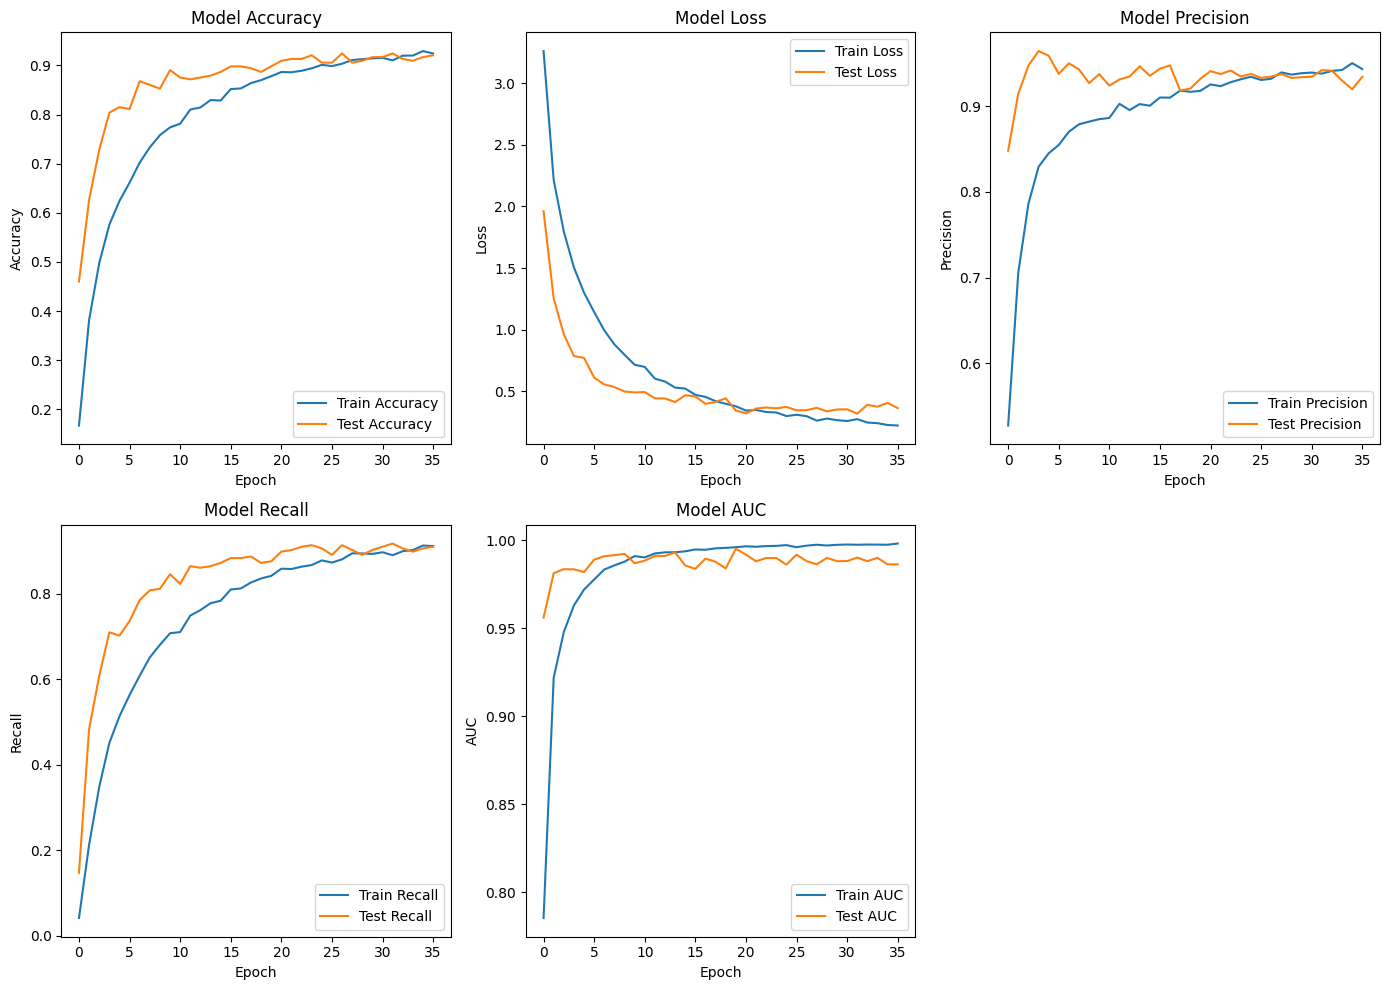

In [55]:
#Vamos a visualizar:
import matplotlib.pyplot as plt

def graficar_resultados(history):
    """
    Función para graficar los resultados del entrenamiento del modelo.
    
    Parámetros:
    history: objeto History devuelto por el método model.fit()
    """
    plt.figure(figsize=(14, 10))

    # Accuracy
    plt.subplot(2, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(2, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Precision
    plt.subplot(2, 3, 3)
    plt.plot(history.history['precision'], label='Train Precision')
    plt.plot(history.history['val_precision'], label='Test Precision')
    plt.title('Model Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()

    # Recall
    plt.subplot(2, 3, 4)
    plt.plot(history.history['recall'], label='Train Recall')
    plt.plot(history.history['val_recall'], label='Test Recall')
    plt.title('Model Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()

    # AUC
    plt.subplot(2, 3, 5)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Test AUC')
    plt.title('Model AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()

    plt.tight_layout()
    plt.show()


graficar_resultados(history_Quinto_modelo_cartas)

In [56]:
# Obtener predicciones sobre el conjunto de validación

# Cargar el modelo
modelo = tf.keras.models.load_model("Modelos/cards_type/Quinto_modelo_cartas.keras")

# Verificar que el modelo se ha cargado correctamente
modelo.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 53)             │         6,837 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,947,009 (37.94 MB)

 Trainable params: 3,315,669 (12.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,631,340 (25.30 MB)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
Número de imágenes predichas correctamente: 245
Número de imágenes predichas incorrectamente: 20


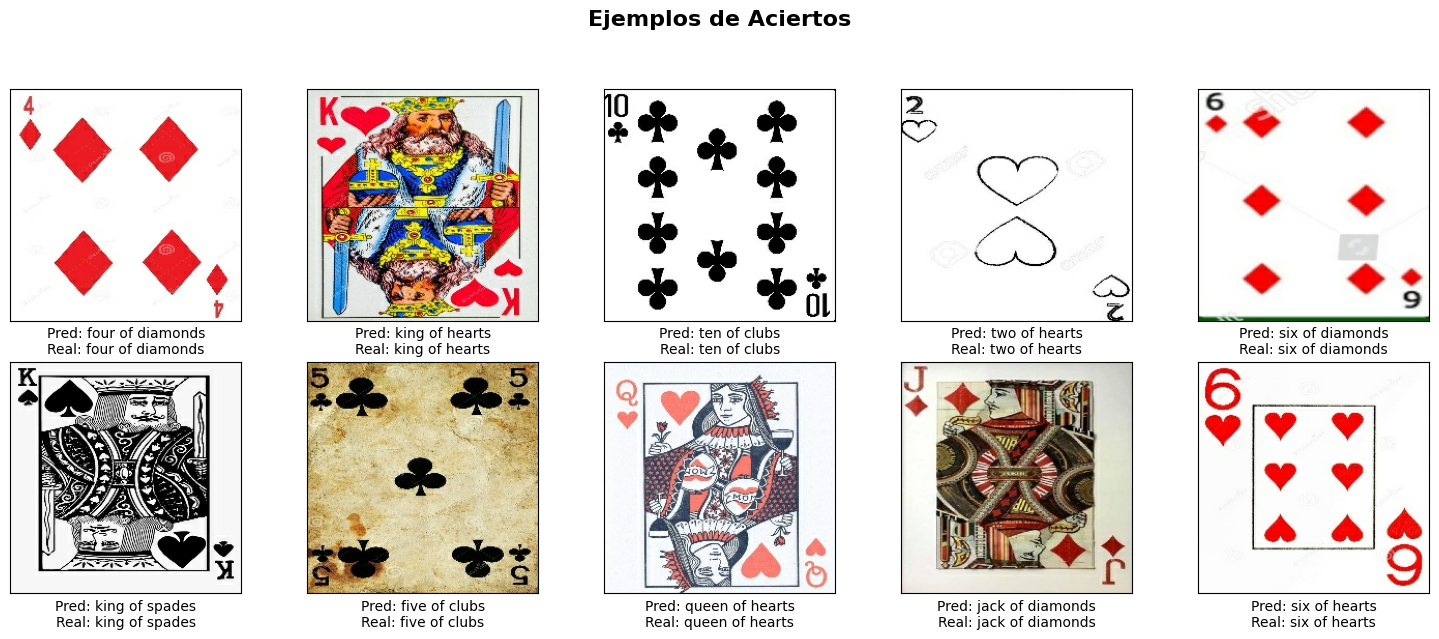

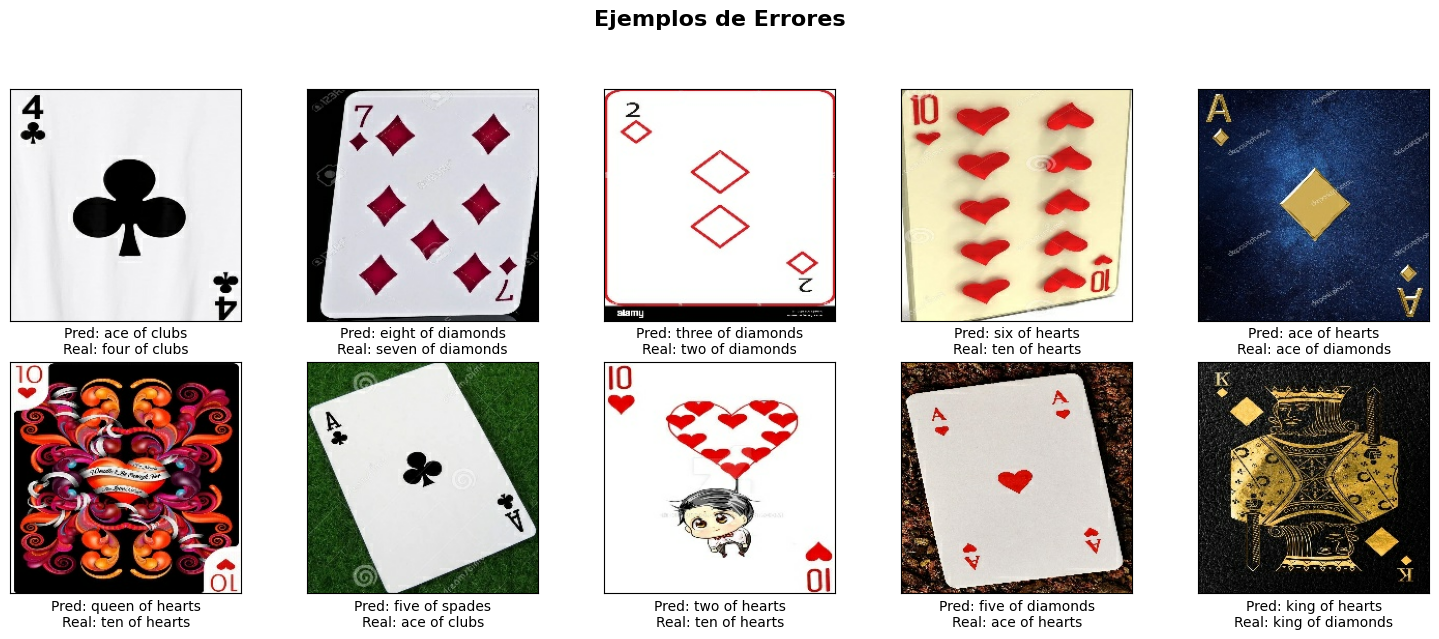

In [57]:
# Obtener predicciones
y_pred_probs = modelo.predict(val_ds)  # Probabilidades de cada clase
y_pred_labels = np.argmax(y_pred_probs, axis=1)  # Índices de las clases predichas

# Obtener etiquetas reales
y_true = np.concatenate([y.numpy() for _, y in val_ds])
y_true_labels = np.argmax(y_true, axis=1)  # Convertir one-hot a índices

# Obtener imágenes de validación
x_images = np.concatenate([x.numpy() for x, _ in val_ds])

# Encontrar aciertos y errores
aciertos = np.where(y_pred_labels == y_true_labels)[0]
errores = np.where(y_pred_labels != y_true_labels)[0]

# Mostrar resumen
print(f"Número de imágenes predichas correctamente: {len(aciertos)}")
print(f"Número de imágenes predichas incorrectamente: {len(errores)}")

# Seleccionar 10 aciertos y 10 errores (o menos si hay pocos)
aciertos_muestra = np.random.choice(aciertos, min(10, len(aciertos)), replace=False)
errores_muestra = np.random.choice(errores, min(10, len(errores)), replace=False)

# Función para mostrar imágenes con etiquetas fuera de la imagen
def mostrar_imagenes(indices, titulo):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 filas, 5 columnas
    fig.suptitle(titulo, fontsize=16, fontweight="bold", y=1.05)  # Centrar título
    
    for ax, idx in zip(axes.ravel(), indices):
        ax.imshow(x_images[idx])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(f"Pred: {class_names[y_pred_labels[idx]]}\nReal: {class_names[y_true_labels[idx]]}", fontsize=10, ha="center")
    
    plt.tight_layout()
    plt.show()

# Mostrar aciertos
mostrar_imagenes(aciertos_muestra, "Ejemplos de Aciertos")

# Mostrar errores
mostrar_imagenes(errores_muestra, "Ejemplos de Errores")

### COMENTARIOS SOBRE EL EJERCICIO:

- Curvas de métricas de training con mejor pinta que las del ejercicio anterior (Menor diferencia de valoes de validación entre epochs). Podría ser una pista sobre que el modelo generaliza mucho mejor.

- Podemos ver similitudes en el conjunto de errores con la carta predicha y la real como es el primer caso, es decir, muchas veces simplemente clasifica mal el número o el palo, pero en pocas ocasiones erra en ambas cosas.

- Curiosa la gran presencia de la carta AS en los errores.

- Se oberva que las imágenes mal clasificadas distan bastante de una carta clásica con enfoque adecuado, aunque precisamente ahí reside el éxito del modelo.....

### ANEXO: COMPARACIÓN QUINTO_MODELO_CARTAS CON KERAS_TUNER_MODEL OBTENIDO EN
### "keras_hyperparameter_tuning.ipynb"

In [9]:
# Carga de modelos:
Quinto_modelo_cartas = tf.keras.models.load_model("Modelos/cards_type/Quinto_modelo_cartas.keras")
keras_tuner_model=tf.keras.models.load_model("Modelos/keras_tuner_dir/keras_tuner_model.keras")

model_list_b=[Quinto_modelo_cartas,
            keras_tuner_model]

scores_models_list_b={}

for model in model_list_b:
    loss, accuracy, precision, recall, auc = model.evaluate(test_ds,verbose=1)
    result1=accuracy
    loss, accuracy, precision, recall, auc = model.evaluate(val_ds,verbose=1)
    result2=accuracy
    scores_models_list_b[model]=((result1+result2)/2)

scores_models_list_b


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.9284 - auc: 0.9960 - loss: 0.2430 - precision: 0.9554 - recall: 0.9238
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.9071 - auc: 0.9881 - loss: 0.3409 - precision: 0.9339 - recall: 0.8967
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8161 - auc: 0.9732 - loss: 0.7311 - precision: 0.8602 - recall: 0.8140
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7957 - auc: 0.9746 - loss: 0.9007 - precision: 0.8216 - recall: 0.7803


{<Sequential name=sequential_5, built=True>: 0.9150943458080292,
 <Sequential name=sequential_1, built=True>: 0.7773585021495819}

Finalizada la comparación seguimos manteniendo la elección del modelo original.